# UK Road Safety – Accident Severity Analysis

### Project Goals
1. Analyse where, when, and why accidents happen in the UK  
2. Identify key factors influencing accident severity  
3. Develop a predictive machine learning model that classifies accidents as **Slight** or **Severe**

### Notebook Scope
This notebook includes the main analytical steps - data cleaning, transformation, feature engineering, and initial modeling - supporting all project objectives.
   
### How to Reproduce

To replicate this analysis:
1. Download the dataset from [Kaggle](https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles).  
2. Place the file `Accident_Information.csv` in the `data/` directory.  
3. Run this notebook from start to finish using Python ≥3.10 and the following libraries:
   - pandas, numpy, matplotlib, seaborn, scikit-learn  
4. All random seeds are fixed for reproducibility.



### License and Acknowledgment

Data source: UK Department for Transport (Open Government License).  
This project is developed for academic purposes as part of the Intoduction to Data Science course at Tartu University



## Data Cleaning

### 1. Importing Libraries

We start by importing the required Python libraries for data loading, analysis, and visualization.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### 2. Load dataset and inspect

The dataset used for this analysis is `Accident_Information.csv`, published by the UK Department for Transport.
We first load it into a pandas DataFrame and inspect its structure.

In [50]:
# Load dataset
df = pd.read_csv("Accident_Information.csv")

# Preview
df.head()

/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/1509846393.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Accident_Information.csv")


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


### 3. Identify and describe key variables


After loading the dataset, we review its structure and identify the most relevant variables for our analysis and modeling tasks.  

The dataset `Accident_Information.csv` contains 34 variables and around 2 million records.  
Each row represents one road accident reported in the United Kingdom.  
The table below lists the **12 key variables** most relevant for analysis and modeling.

| Variable | Description | Type | Measurement Level |
|-----------|--------------|------|-------------------|
| Accident_Index | Unique identifier for each accident | object | ID |
| Date | Date of the accident | datetime | Temporal |
| Time | Time of day (HH:MM) | object | Temporal |
| Day_of_Week | Day when the accident occurred | object | Ordinal |
| Year | Year of the accident | int | Temporal |
| Weather_Conditions | Weather during the accident | object | Nominal |
| Light_Conditions | Lighting at the time of the accident | object | Nominal |
| Road_Surface_Conditions | Condition of the road surface | object | Nominal |
| Urban_or_Rural_Area | Whether the area is urban or rural | object | Nominal |
| Speed_limit | Legal speed limit at the location (mph) | float | Ratio |
| Number_of_Vehicles | Number of vehicles involved | float | Ratio |
| Accident_Severity | Severity level (Slight / Serious / Fatal) | object | Ordinal (Target) |

These selected features form the foundation for both the descriptive exploration and predictive modeling stages of this project.
They provide the necessary information to understand **when, where, and under what conditions** accidents occur, and how these factors may influence their severity.



### 4. Data Preprocessing

After inspecting the dataset, the next step is to prepare it for analysis by filtering and cleaning the data.  
This involves converting data types, removing duplicates, validating numeric ranges, and keeping only records that fall within valid geographic and temporal boundaries.

The following preprocessing steps were performed:
1. Converted the `Date` column to a datetime format.  
2. Filtered the dataset to include only accidents that occurred between **2012–2017**, representing the most recent and consistent time period.  
3. Removed duplicate records based on the unique accident identifier `Accident_Index`.  
4. Excluded rows with unrealistic or invalid numeric values (e.g., `Speed_limit`, `Number_of_Vehicles`, `Number_of_Casualties`).  
5. Retained only records with valid **UK latitude and longitude** coordinates.
6. **Ordinal encoding** was applied to Accident_Severity, while other categorical features will be one-hot encoded during model preparation.

Each of these steps improves the quality and reliability of the dataset, ensuring that subsequent analysis and modeling are based on accurate and consistent data.

In [51]:
# Check size and data types
df.info()

# Number of rows and columns
print("Rows:", df.shape[0], "Columns:", df.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [52]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Filter accidents from 2012 to 2017
df = df[(df["Date"].dt.year >= 2012) & (df["Date"].dt.year <= 2017)]

print("Filtered dataset:", df.shape)


Filtered dataset: (837212, 34)


In [53]:
# Remove duplicates based on Accident_Index
df = df.drop_duplicates(subset="Accident_Index", keep="first")
print("After removing duplicates:", df.shape)


After removing duplicates: (837212, 34)


In [54]:
# Remove records with invalid numeric ranges
df = df[
    (df["Number_of_Vehicles"] > 0) &
    (df["Number_of_Casualties"] >= 0) &
    (df["Speed_limit"].between(20, 70))  # valid UK road limits
]

print("After numeric validation:", df.shape)


After numeric validation: (837171, 34)


In [55]:
# Keep records with valid UK latitude/longitude
df = df[
    df["Longitude"].between(-10, 2) &
    df["Latitude"].between(49, 60)
]

print("After coordinate check:", df.shape)


After coordinate check: (836974, 34)


In [56]:
# Encode accident severity levels as ordered numeric values 
# (0 = Slight, 1 = Serious, 2 = Fatal) for easier analysis and modeling
severity_map = {"Slight": 0, "Serious": 1, "Fatal": 2}
df["Accident_Severity"] = df["Accident_Severity"].map(severity_map)

### 5. Verify Data Availability

Before proceeding to deeper exploration, several validation checks were performed to ensure that the dataset is complete, consistent, and correctly structured.

- **Missing values:**  
  The majority of variables are fully populated, with only a few columns (e.g., `2nd_Road_Class` ≈ 40% and `Carriageway_Hazards` ≈ 98%) showing missing or undefined values.  
  These attributes are non-critical for the project goals and will be handled or excluded later.

- **Unique category inspection:**  
  Key categorical variables such as `Weather_Conditions`, `Light_Conditions`, and `Road_Surface_Conditions` were examined to confirm that all categories are valid and interpretable.  
  No irregular or duplicate category labels were found.

- **Numeric and temporal checks:**  
  The ranges of numeric attributes (`Speed_limit`, `Number_of_Vehicles`, `Number_of_Casualties`) are realistic and within legal UK limits.  
  Date values span from **2012 to 2017**, confirming the expected data period.  

- **Spatial validation:**  
  Latitude and longitude values fall entirely within the UK boundaries (49–60° N, −10–2° E), ensuring spatial consistency.

- **Target variable distribution:**  
  The accident severity variable is imbalanced, with **83.8% Slight**, **15.0% Serious**, and **1.2% Fatal** cases.  
  This imbalance will need to be addressed later during model training (e.g., resampling or weighting).

Overall, the dataset passes essential quality checks and can be considered reliable for exploratory and predictive analysis.

In [57]:
# Count missing values in each column
missing = df.isna().sum().sort_values(ascending=False)

# Calculate percentage of missing data
missing_percent = (df.isna().sum() / len(df) * 100).round(2)

# Combine results
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Percent': missing_percent
})

missing_summary.head(10)


,Missing Values,Percent
1st_Road_Class,0,0.00
1st_Road_Number,0,0.00
2nd_Road_Class,338534,40.45
2nd_Road_Number,4797,0.57
Accident_Index,0,0.00
Accident_Severity,0,0.00
Carriageway_Hazards,820125,97.99
Date,0,0.00
Day_of_Week,0,0.00
Did_Police_Officer_Attend_Scene_of_Accident,9,0.00


In [58]:
# Check missing values
df.isna().sum().sort_values(ascending=False).head(10)

# Check unique values for key categorical columns
for col in ["Weather_Conditions", "Light_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Accident_Severity"]:
    print(f"\n{col}:\n", df[col].value_counts(dropna=False).head())




Weather_Conditions:
 Weather_Conditions
Fine no high winds       676639
Raining no high winds     96669
Unknown                   18531
Other                     14582
Raining + high winds      11509
Name: count, dtype: int64

Light_Conditions:
 Light_Conditions
Daylight                       610314
Darkness - lights lit          165452
Darkness - no lighting          42985
Darkness - lighting unknown     13297
Darkness - lights unlit          4916
Name: count, dtype: int64

Road_Surface_Conditions:
 Road_Surface_Conditions
Dry                             589271
Wet or damp                     225679
Frost or ice                     13175
Snow                              3890
Data missing or out of range      3725
Name: count, dtype: int64

Urban_or_Rural_Area:
 Urban_or_Rural_Area
Urban          549601
Rural          287372
Unallocated         1
Name: count, dtype: int64

Accident_Severity:
 Accident_Severity
0    701627
1    125463
2      9884
Name: count, dtype: int64


In [59]:
# Quick check for unusual or extreme values
df[["Speed_limit", "Number_of_Vehicles", "Number_of_Casualties"]].describe()


,Speed_limit,Number_of_Vehicles,Number_of_Casualties
count,836974.000000,836974.000000,836974.000000
mean,38.119177,1.835425,1.328721
std,13.938354,0.711949,0.803885
min,20.000000,1.000000,1.000000
25%,30.000000,1.000000,1.000000
50%,30.000000,2.000000,1.000000
75%,40.000000,2.000000,1.000000
max,70.000000,67.000000,93.000000


In [60]:
# Check date parsing and year coverage
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
print("Years range:", df["Date"].dt.year.min(), "-", df["Date"].dt.year.max())

# Count number of records per year
df["Year"].value_counts().sort_index()


Years range: 2012 - 2017


Year
2012    145544
2013    138637
2014    146298
2015    140002
2016    136555
2017    129938
Name: count, dtype: int64

In [61]:
# Check if coordinates are within UK bounds
valid_lat = df["Latitude"].between(49, 60).mean() * 100
valid_lon = df["Longitude"].between(-10, 2).mean() * 100
print(f"Valid Latitude values: {valid_lat:.2f}%")
print(f"Valid Longitude values: {valid_lon:.2f}%")


Valid Latitude values: 100.00%
Valid Longitude values: 100.00%


In [62]:
# Distribution of target variable
df["Accident_Severity"].value_counts(normalize=True).mul(100).round(2)


Accident_Severity
0    83.83
1    14.99
2     1.18
Name: proportion, dtype: float64

### 6. Exploring Data

This section explores the main temporal, environmental, and spatial patterns in the dataset to better understand when, where, and under what conditions road accidents occur in the United Kingdom.
The analysis combines descriptive statistics and visualizations to reveal trends in accident frequency, severity, and contributing factors such as time of day, weather, lighting, and speed limits.
These insights provide the foundation for selecting features in the upcoming modeling stage.

In [63]:
# Basic style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("crest")


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


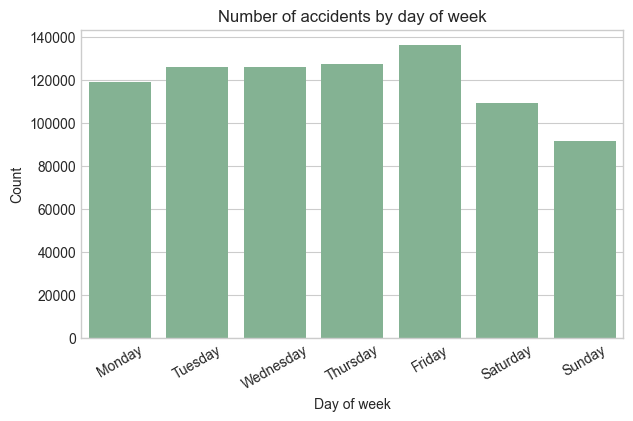

/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/1716535113.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour


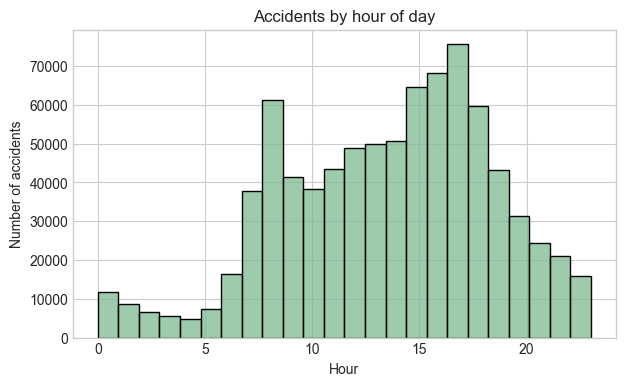

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


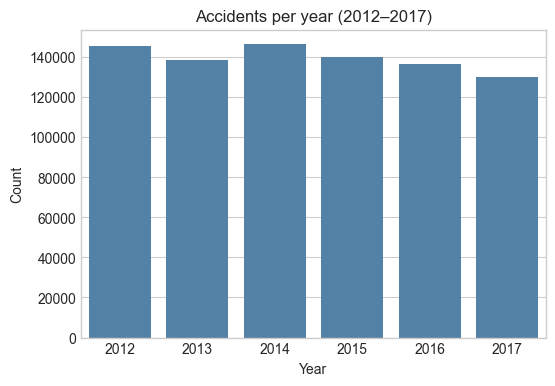

In [64]:
# Accidents by day of week
plt.figure(figsize=(7,4))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(data=df, x="Day_of_Week", order=order)
plt.title("Number of accidents by day of week")
plt.xlabel("Day of week")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

# Accidents by hour
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour
plt.figure(figsize=(7,4))
sns.histplot(df["Hour"].dropna(), bins=24, kde=False)
plt.title("Accidents by hour of day")
plt.xlabel("Hour")
plt.ylabel("Number of accidents")
plt.show()

# Accidents by year
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Year", color="steelblue")
plt.title("Accidents per year (2012–2017)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


**Number of Accidents by Day of Week**   
The distribution shows a clear weekly pattern.  
Accident counts gradually increase towards the end of the week, peaking on Friday, which likely reflects higher traffic volume and pre-weekend activity.  
The lowest number of accidents occurs on Sunday, when overall traffic density is reduced.  

**Number of Accidents by Hour of Day**  
The hourly distribution highlights two distinct peaks:
- one in the morning (8:00–9:00) and another in the afternoon (16:00–18:00), corresponding to daily commuting hours.   
   
This confirms that road congestion during rush hours is a major contributing factor to accident frequency.

**Number of Accidents by Year (2012–2017)**  
Annual data show a gradual decrease in accident counts over time.   
This trend may reflect improvements in vehicle safety, stricter enforcement of traffic laws, and awareness campaigns by the UK Department for Transport.    
Despite the decline, the large number of incidents indicates that road safety remains a relevant public concern.   

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the gr

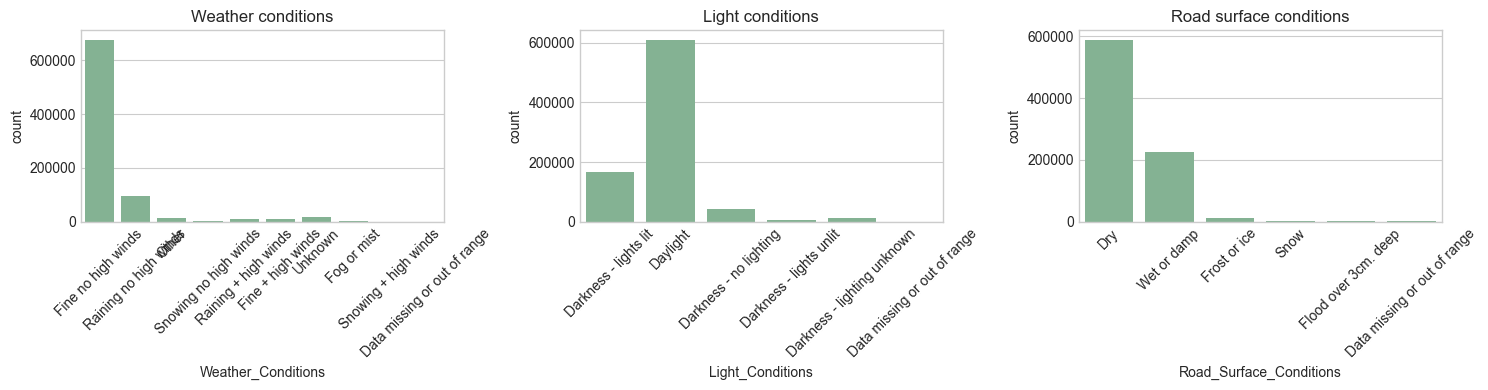

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.countplot(data=df, x="Weather_Conditions", ax=axes[0])
axes[0].set_title("Weather conditions")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Light_Conditions", ax=axes[1])
axes[1].set_title("Light conditions")
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Road_Surface_Conditions", ax=axes[2])
axes[2].set_title("Road surface conditions")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Weather, Light, and Road Surface Conditions**  
These plots illustrate how environmental factors influence accidents:   
- Most accidents occur under clear and dry conditions, not extreme weather - suggesting that driver behavior, not just bad weather, plays a key role.
- Daylight conditions dominate, though a notable number occur in darkness with lighting, indicating that urban lighting reduces risk but does not eliminate it.
- Wet or damp roads are the second most common condition, reinforcing the importance of traction and braking control.

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


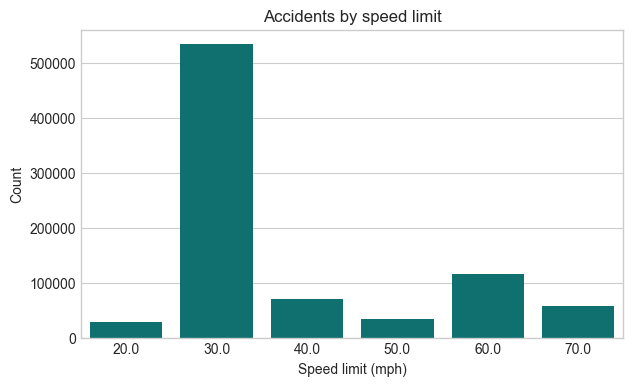

/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/2220854676.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Accident_Severity", order=["Slight", "Serious", "Fatal"], palette="crest")
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew

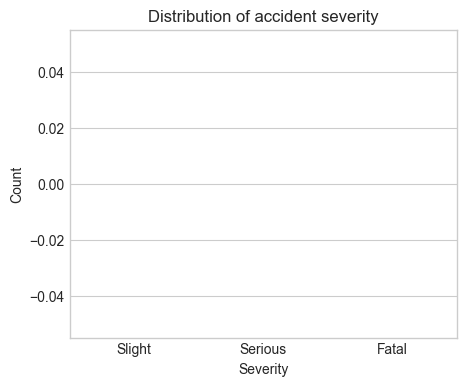

In [66]:
# Distribution of accidents by speed limit
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Speed_limit", color="teal")
plt.title("Accidents by speed limit")
plt.xlabel("Speed limit (mph)")
plt.ylabel("Count")
plt.show()

# Severity distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Accident_Severity", order=["Slight", "Serious", "Fatal"], palette="crest")
plt.title("Distribution of accident severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


**Accidents by Speed Limit**  
The majority of recorded accidents happen on roads with a 30 mph speed limit, typical for urban and residential areas.  
This aligns with the earlier observation that accidents are concentrated in densely populated regions.  
Higher-speed roads (50–70 mph) show fewer accidents overall but potentially higher severity.  

**Distribution of Accident Severity**   
The severity distribution confirms a strong imbalance:
Slight accidents account for nearly 84%, while Serious and Fatal make up 15% and 1%, respectively.    
This reflects real-world proportions and will be addressed later during model training through resampling or class weighting.  

/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/3935255639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Accident_Severity", y="Speed_limit", palette="crest")
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-

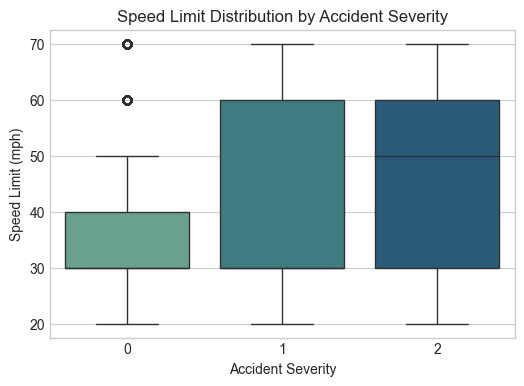

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Accident_Severity", y="Speed_limit", palette="crest")
plt.title("Speed Limit Distribution by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Speed Limit (mph)")
plt.show()


**Speed Limit Distribution by Accident Severity**   
This boxplot compares speed limits across different accident severity levels.    
The median speed limit increases slightly with severity, suggesting that serious and fatal accidents tend to occur on faster roads.  
However, the interquartile ranges overlap, indicating that speed limit alone is not the only determinant of accident severity.  

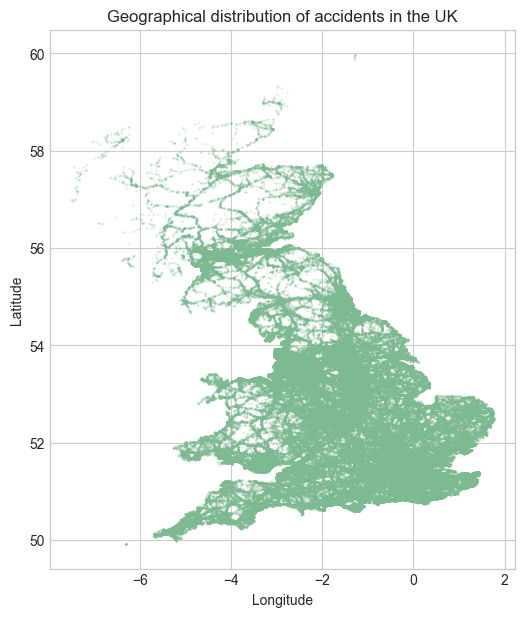

In [68]:
# Scatter plot of coordinates (quick visual check)
plt.figure(figsize=(6,7))
plt.scatter(df["Longitude"], df["Latitude"], s=0.1, alpha=0.5)
plt.title("Geographical distribution of accidents in the UK")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


**Geographical Distribution of Accidents in the UK**  
The scatter plot provides a geographical overview of all accident locations.   
Dense clusters are visible around major urban centers such as London, Birmingham, and Manchester, as well as along main highways.  
Rural regions show lower densities, consistent with lower traffic volumes.  

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this wa

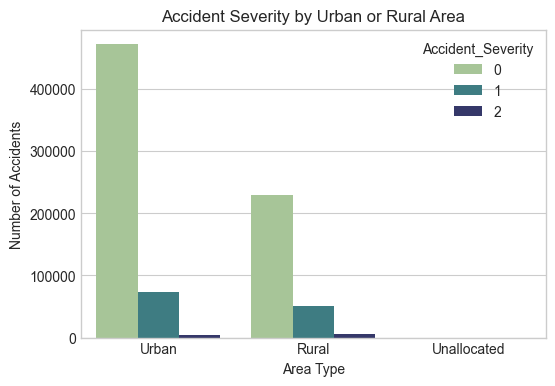

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Urban_or_Rural_Area", hue="Accident_Severity", palette="crest")
plt.title("Accident Severity by Urban or Rural Area")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.show()


**Accident Severity by Urban or Rural Area**
This countplot shows that most accidents happen in urban areas, but the relative share of serious and fatal accidents is higher in rural zones.  
This pattern may be due to higher speeds, less lighting, and slower emergency response times outside cities.   

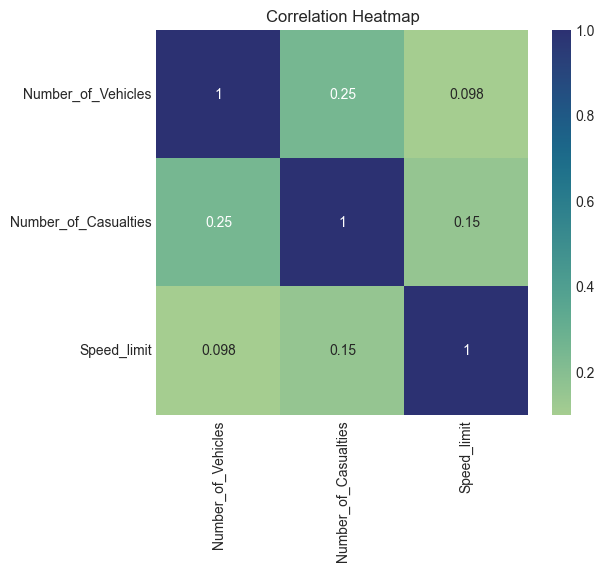

In [70]:
plt.figure(figsize=(6,5))
sns.heatmap(df[["Number_of_Vehicles", "Number_of_Casualties", "Speed_limit"]].corr(), annot=True, cmap="crest")
plt.title("Correlation Heatmap")
plt.show()


**Correlation Heatmap**  
The heatmap illustrates correlations between numeric variables.  
There is a moderate positive correlation (0.24) between the number of vehicles and casualties, meaning multi-vehicle collisions often result in more injuries.  
Speed limit, however, shows weak correlation, implying that severity depends more on situational and human factors than on road limits alone.  

/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/423413713.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour
/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/423413713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Hour", y="Accident_Severity", palette="crest", scale="count")
/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/423413713.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df, x="Hour", y="Accident_Severity", palette="crest", scale="count")


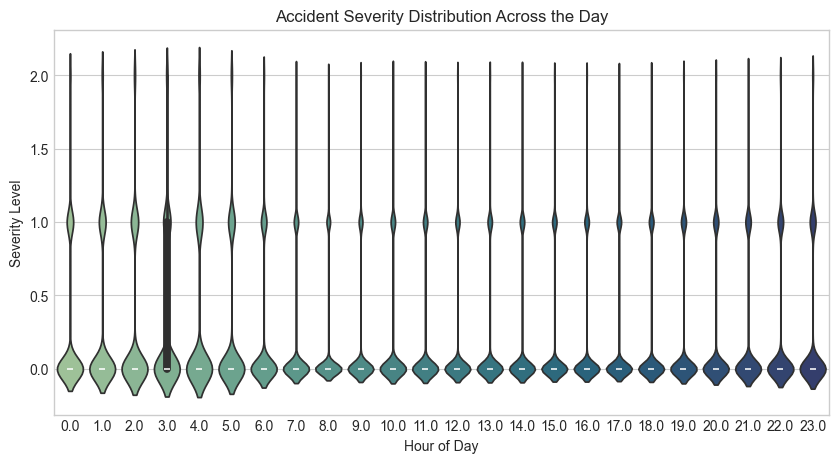

In [71]:
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="Hour", y="Accident_Severity", palette="crest", scale="count")
plt.title("Accident Severity Distribution Across the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Severity Level")
plt.show()


**Accident Severity Distribution Across the Day**  
This violin plot visualizes how accident severity varies by hour of day.   
Accidents occur throughout the day, but the distribution widens during late evening and early morning hours, possibly reflecting lower visibility and driver fatigue.  
Overall, most accidents remain slight, but nighttime events show a heavier tail toward serious cases.  